# 1. Import all the required Libraries and load the data file using pandas.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 2. Check for null values in the data. Get the number of null values for each column.

In [5]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Rating, Type, Content Rating, Current Ver & Android Ver have null values

# 3. Drop records with nulls in any of the columns.

In [7]:
print("Frame Size before : " , df.shape)
df.dropna(subset=['Rating', 'Type', 'Content Rating', 'Current Ver' , 'Android Ver'],axis=0, inplace=True)
print("Frame Size After : " , df.shape)
df.isna().sum()

Frame Size before :  (10841, 13)
Frame Size After :  (9360, 13)


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# 4. Variables seem to have incorrect type and inconsistent formatting. You need to fix them:

# 4.1 Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

4.1.1 Extract the numeric value from the column

4.1.2 Multiply the value by 1,000, if size is mentioned in Mb

In [9]:
j=df.columns.get_loc('Size')
for i in range(0,len(df)):
    if df.iloc[i,j].lower().endswith('k'):
        df.iloc[i,j]=float(df.iloc[i,j][0:-1])
    elif df.iloc[i,j].lower().endswith('m'):
        df.iloc[i,j]=float(df.iloc[i,j][0:-1])*1000

In [10]:
df.Size=pd.to_numeric(df.Size,errors='coerce')
df.dropna(subset=['Size'],inplace=True)
df.shape

(7723, 13)

# 4.2 Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [11]:
df.Reviews=df.Reviews.astype('float64')
df.Reviews.dtypes

dtype('float64')

# 4.3 Installs field is currently stored as string and has values like 1,000,000+.

4.3.1  Treat 1,000,000+ as 1,000,000 

4.3.2  Remove ‘+’, ‘,’ from the field, convert it to integer.

In [12]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [13]:
df.Installs=df.Installs.str.replace(',','').str.replace('+','').astype('int64')

In [14]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
             1000,  500000000,        100,        500,         10,
       1000000000,          5,         50,          1], dtype=int64)

# 4.4 Price field is a string and has dollar symbol. Remove dollar sign, and convert it to numeric.

In [15]:
df['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [16]:
df.Price=df.Price.str.replace('$','').astype('float64')

In [17]:
df['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

In [18]:
df.Price.dtype

dtype('float64')

# 5. Sanity checks:

# 5.1 Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

In [19]:
filter=(df.Rating < 1) | (df.Rating > 5)
print("Data Frame size : ", df.shape, " count of rows containing WRONG Rating : ",filter.value_counts())

Data Frame size :  (7723, 13)  count of rows containing WRONG Rating :  False    7723
Name: Rating, dtype: int64


All the ratings are proper.

# 5.2 Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [20]:
rows=df[df.Installs < df.Reviews].index
df.drop(rows,axis=0,inplace=True)
df.shape

(7717, 13)

# 5.3 For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [21]:
rows=df[(df.Type.str.lower()=='free' )& (df.Price > 0)].index
rows

Int64Index([], dtype='int64')

No case with App type as FREE and price greater than 0

# 6. Performing univariate analysis:

# 6.1 Boxplot for Price

<AxesSubplot:xlabel='Price'>

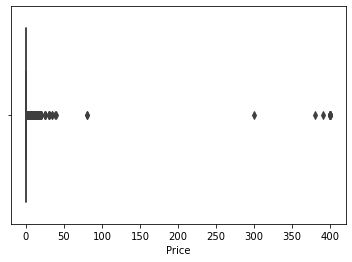

In [22]:
import seaborn as sns
sns.boxplot(df.Price)

Question : Are there any outliers? Think about the price of usual apps on Play Store.

Answer:   Yes there are outliers the rows with price greater than $250 need to be removed

# 6.2 Boxplot for Reviews

<AxesSubplot:xlabel='Reviews'>

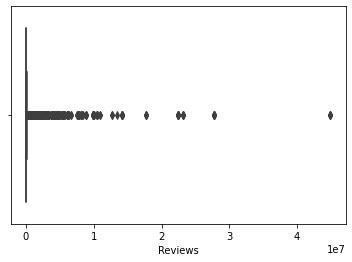

In [23]:
sns.boxplot(x='Reviews',data=df)

Question : Are there any apps with very high number of reviews? Do the values seem right?

Answer : There is one, the value seems correct because its in limit.

# 6.3 Histogram for Rating

(array([  17.,   18.,   39.,   72.,  132.,  408.,  781., 1406., 3212.,
        1632.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

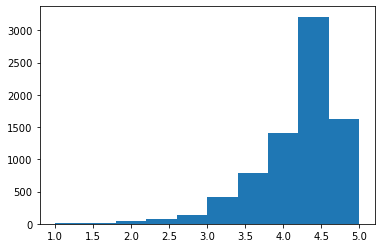

In [24]:
plt.hist(df.Rating)

Question : How are the ratings distributed? Is it more toward higher ratings?

Answer : Yes, the ratings are distributed towards higher ratings.

# 6.4 Histogram for Size

(array([3245., 1398.,  991.,  606.,  449.,  325.,  226.,  161.,  117.,
         199.]),
 array([8.500000e+00, 1.000765e+04, 2.000680e+04, 3.000595e+04,
        4.000510e+04, 5.000425e+04, 6.000340e+04, 7.000255e+04,
        8.000170e+04, 9.000085e+04, 1.000000e+05]),
 <BarContainer object of 10 artists>)

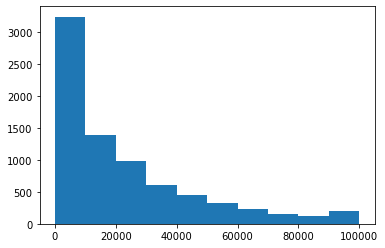

In [25]:
plt.hist(df.Size)

# 7. Outlier treatment:

# 7.1 Price: From the box plot, it seems like there are some apps with very high price. 

A price of $200 for an application on the Play Store is very high and suspicious!
Check out the records with very high price Is 200 indeed a high price? Drop these as most seem to be junk apps.

In [26]:
df['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

Yes $200 is a high price.

In [27]:
df.drop(df[df.Price>200].index,axis=0,inplace=True)
df.shape

(7702, 13)

In [28]:
df['Price'].unique()

array([ 0.  ,  4.99,  6.99,  7.99,  3.99,  5.99,  2.99,  1.99,  9.99,
        0.99,  9.  ,  5.49, 10.  , 24.99, 11.99, 79.99, 16.99, 14.99,
       29.99, 12.99,  3.49, 10.99,  7.49,  1.5 , 19.99, 15.99, 33.99,
       39.99,  2.49,  4.49,  1.7 ,  1.49,  3.88, 17.99,  3.02,  1.76,
        4.84,  4.77,  1.61,  1.59,  6.49,  1.29, 37.99, 18.99,  8.49,
        1.75, 14.  ,  2.  ,  3.08,  2.59, 19.4 , 15.46,  8.99,  3.04,
       13.99,  4.29,  3.28,  4.6 ,  1.  ,  2.9 ,  1.97,  2.56,  1.2 ])

# 7.2 Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [30]:
df.drop(df[df.Reviews>2000000].index,axis=0,inplace=True)
df.shape

(7483, 13)

# 7.3 Installs: There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99 Decide a threshold as cutoff for outlier and drop records
having values more than that

In [31]:
df.Installs.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10        1000.0
0.25       10000.0
0.50      100000.0
0.70     1000000.0
0.90    10000000.0
0.95    10000000.0
0.99    50000000.0
Name: Installs, dtype: float64

Taking 10000000 as the cutoff as only 5% records have values more than this

In [32]:
df=df[df.Installs<10000000]
df.shape

(6489, 13)

# 8.  Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

# 8.1 Make scatter plot/joinplot for Rating vs. Price

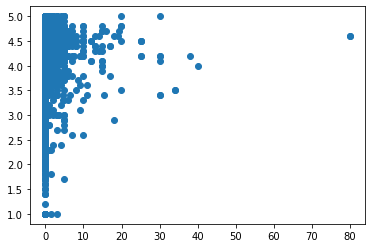

In [33]:
plt.scatter(x=df.Price,y=df.Rating)

Question : What pattern do you observe? Does rating increase with price?

Answer : Rating doesn't increase with price

# 8.2 Make scatter plot/joinplot for Rating vs. Size

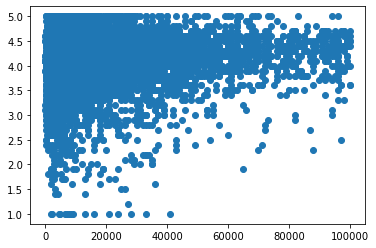

In [34]:
plt.scatter(x=df.Size,y=df.Rating)

Question: Are heavier apps rated better?

Answer: It can be observed that heavier apps are having higher rating

# 8.3 Make scatter plot/joinplot for Rating vs. Reviews

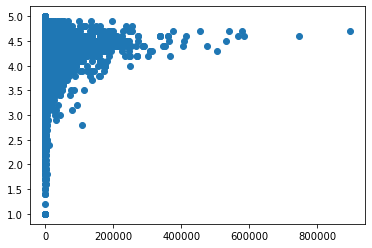

In [36]:
plt.scatter(x=df.Reviews,y=df.Rating)

Question : Does more review mean a better rating always?

Answer : Scatter plot indicates higher rating for apps having Max reviews. But this cannot be always it could be an outlier.

# 8.4 Make boxplot for Rating vs. Content Rating

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

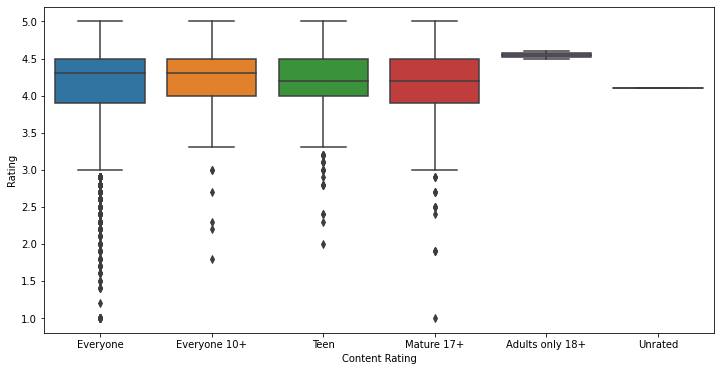

In [37]:
plt.figure(figsize=[12,6])
sns.boxplot(y='Rating',x='Content Rating',data=df)

Question : Is there any difference in the ratings? Are some types liked better?

Answer : Not much conclusion could be drawn as the plot is almost same for Content Ratings, except Adults only 18+ & Unrated.

# 8.5 Make boxplot for Ratings vs. Category

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

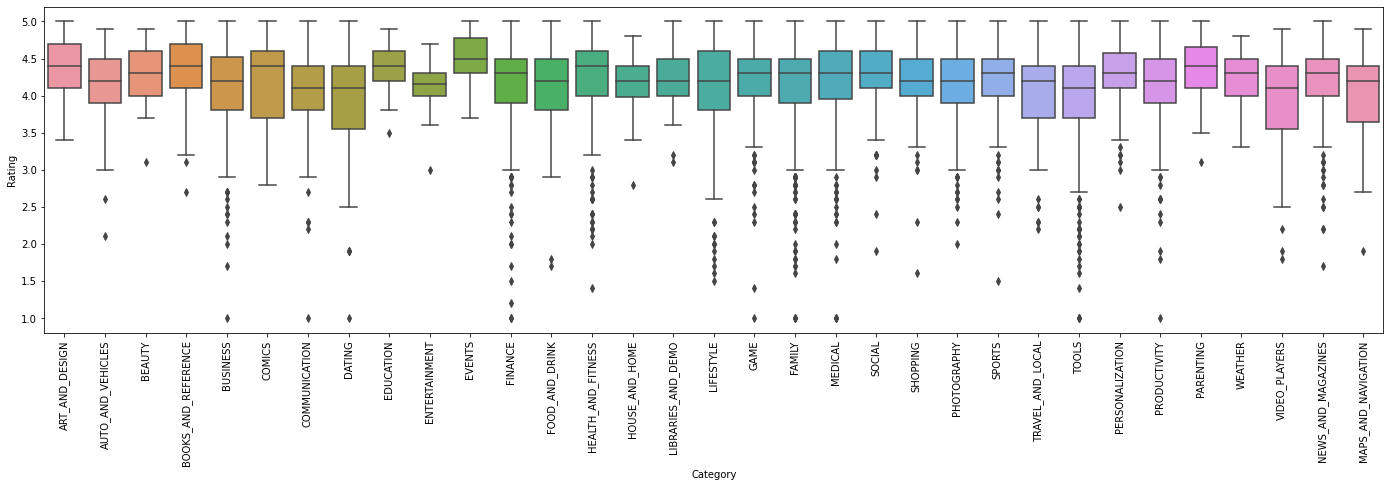

In [38]:
plt.figure(figsize=[24,6])
sns.boxplot(y='Rating',x='Category',data=df)
plt.xticks(rotation=90)

Question : Which genre has the best ratings?

Answer : ART_AND_DESIGN and EVENTS

# 9. Data preprocessing

For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

In [39]:
inp1=df
inp1.reset_index(drop=True,inplace=True)
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


# 9.1 Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [40]:
inp1.Reviews=np.log1p(inp1.Reviews)
inp1.Installs=np.log1p(inp1.Installs)
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
4,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


# 9.2 drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [41]:
inp1.drop(['App', 'Last Updated', 'Current Ver','Android Ver'],axis=1,inplace=True)

In [42]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity
4,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design


# 9.3 Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [44]:
inp1=pd.get_dummies(inp1,columns=['Category', 'Genres', 'Content Rating','Type'],drop_first=True)
inp2=inp1.copy()
inp2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word', 'Content Rating_Everyone', 'Content Rating_Everyone 10+',
       'Content Rating_Mature 17+', 'Content Rating_Teen',
       'Content Rating_Unrated', 'Type_Paid'],
      dtype='object', length=150)

# 10. Train test split and apply 70-30 split. Name the new dataframes df_train and df_test.

In [45]:
from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(inp2,test_size=0.3,random_state=100)

# 11. Separate the dataframes into X_train, y_train, X_test, and y_test

y_train=df_train.pop('Rating')
X_train=df_train
y_test=df_test.pop('Rating')
X_test=df_test

# 12. Model building

Use linear regression as the technique. Report the R2 on the train set

In [47]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

from sklearn.metrics import r2_score
y_train_predict=lm.predict(X_train)
r2_score(y_train,y_train_predict)

0.14998979685933733

# 13. Make predictions on test set and report R2

In [48]:
X_test_prect=lm.predict(X_test)
r2_score(y_test,X_test_prect)

0.11430599857819435

Conclusion : Here the model does not perform well, because the model is very simple and the dataset is little complex.

Hypothesis : Whenever this model is used, the predictions will be 11% correct.